### Lets import the libraries

In [60]:
import pandas as pd
import numpy as np

### Lets get the Data

In [61]:
df = pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Lets understand the Data

In [62]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [63]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Lets split into x and y

In [65]:
# pd.get_dummies(df)
y = df.iloc[:,:1]
y

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [66]:
x = df.iloc[:,1:]

In [67]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [68]:
x["ShelveLoc"] = x["ShelveLoc"].replace("Bad",0)
x["ShelveLoc"] = x["ShelveLoc"].replace("Medium",1)
x["ShelveLoc"] = x["ShelveLoc"].replace("Good",2)



In [69]:
x["ShelveLoc"]= x["ShelveLoc"].astype(object)
x.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [70]:
x["ShelveLoc"].dtype

dtype('O')

In [71]:
con_cols = [col for col in x.columns if x[col].dtype != "object"]
cat_cols = [col for col in x.columns if x[col].dtype == "object"]

##### Lets Visualize the data

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x1000 with 0 Axes>

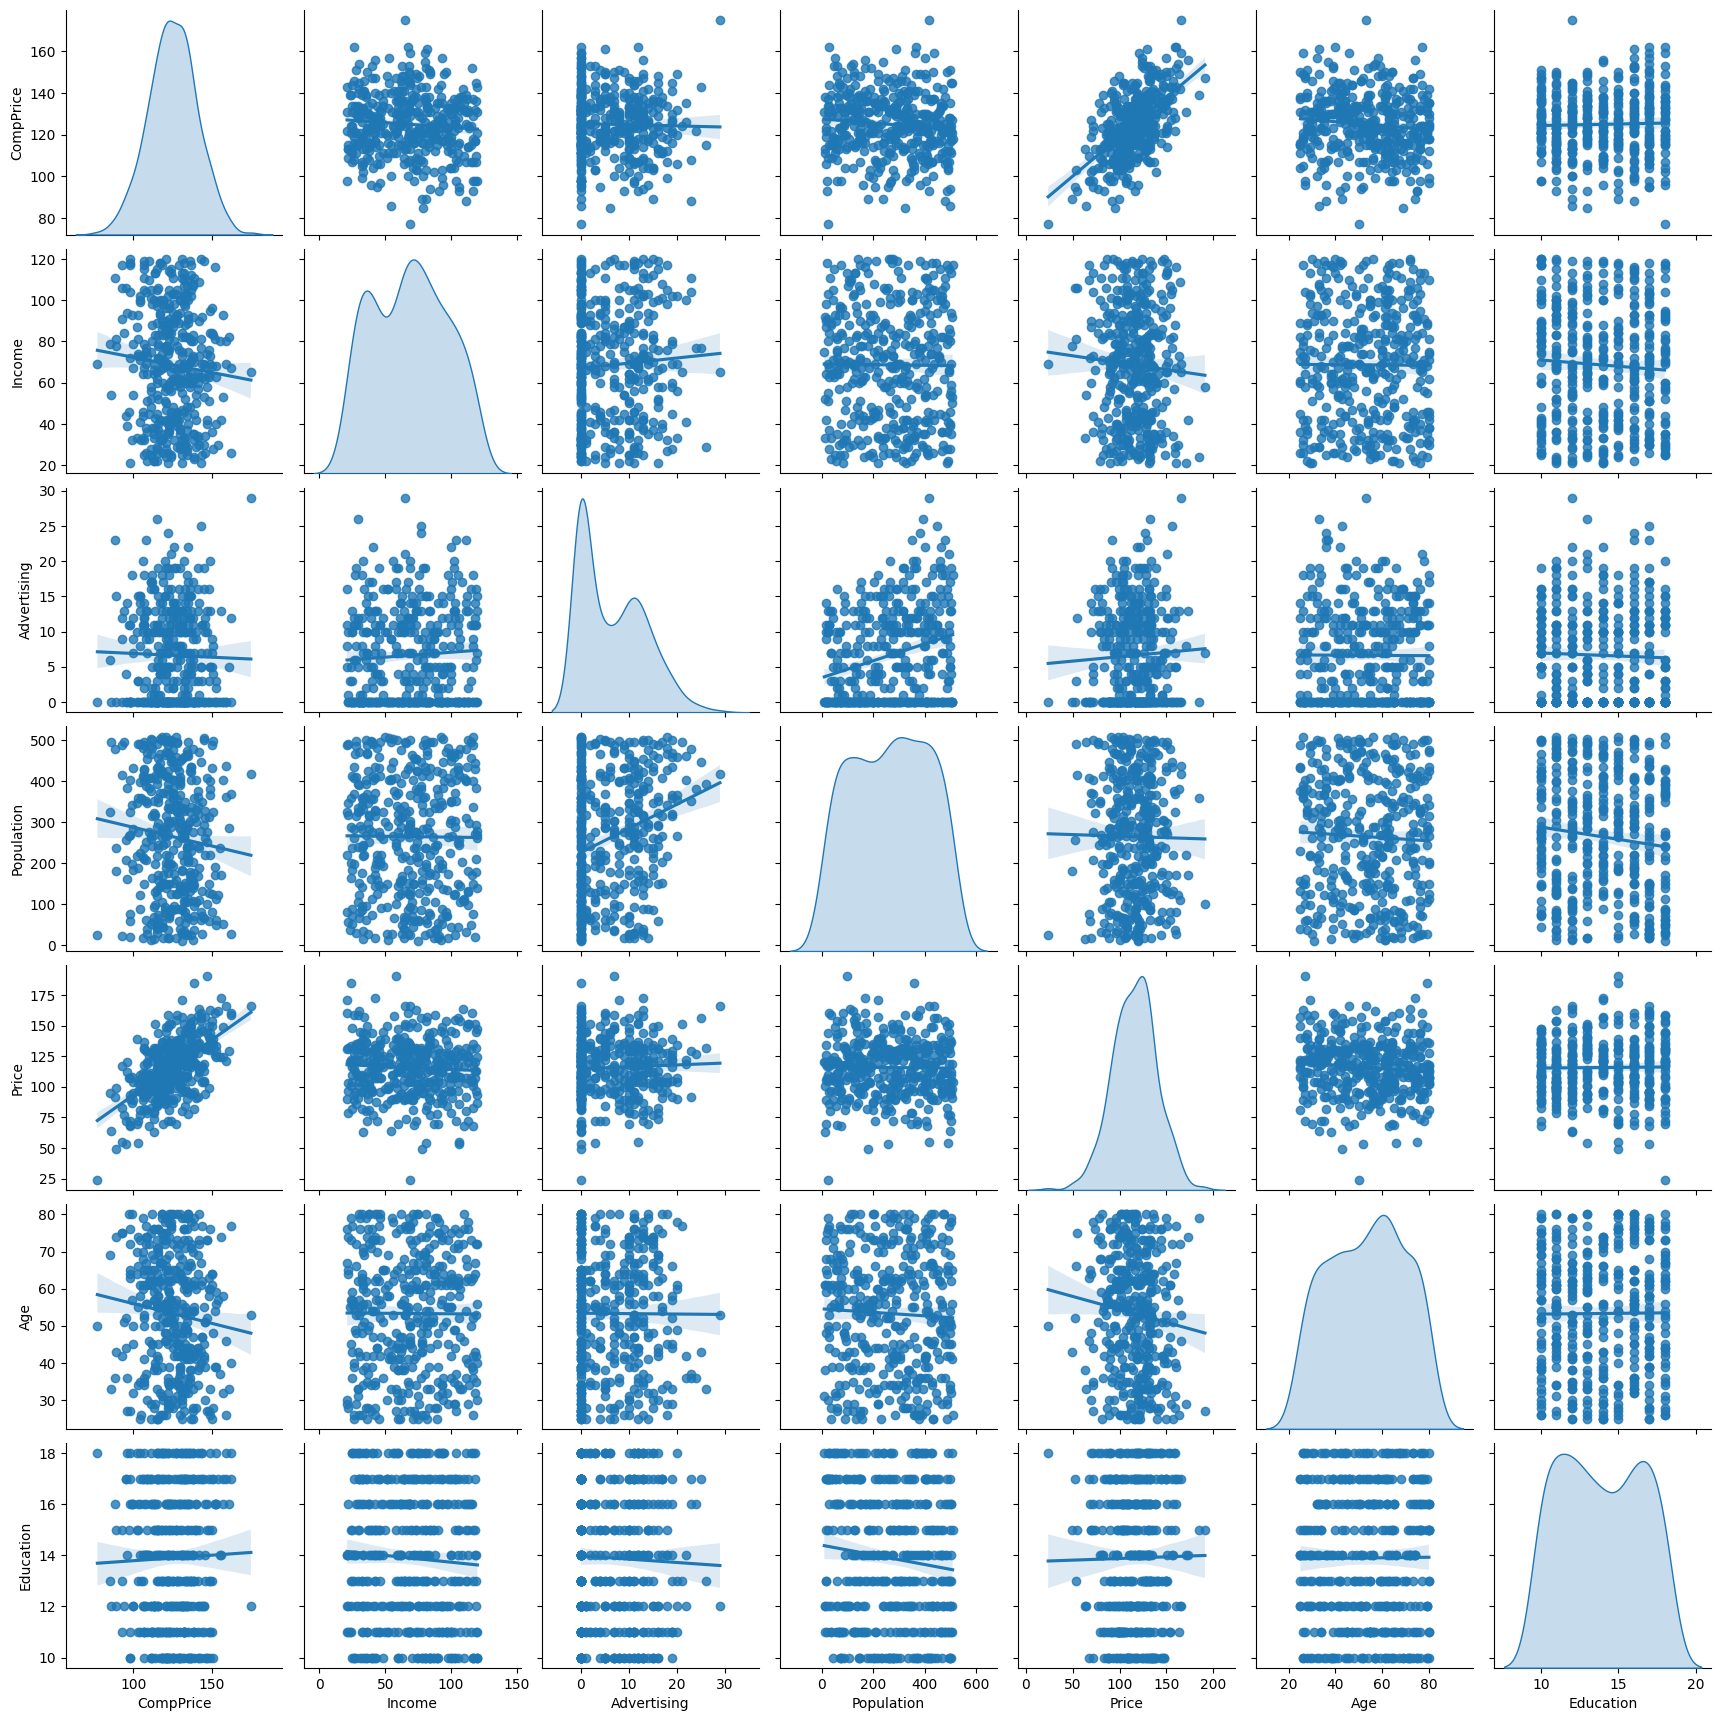

In [73]:
plt.figure(figsize=(14,10))
sns.pairplot(df[con_cols], kind="reg", diag_kind='kde')
plt.show()

In [74]:
print(df["Education"].value_counts())
print(df.shape)

Education
17    49
12    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: count, dtype: int64
(400, 11)


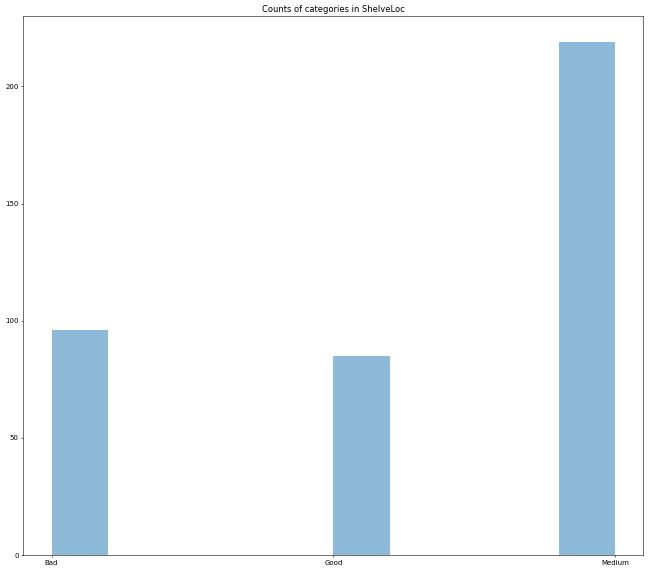

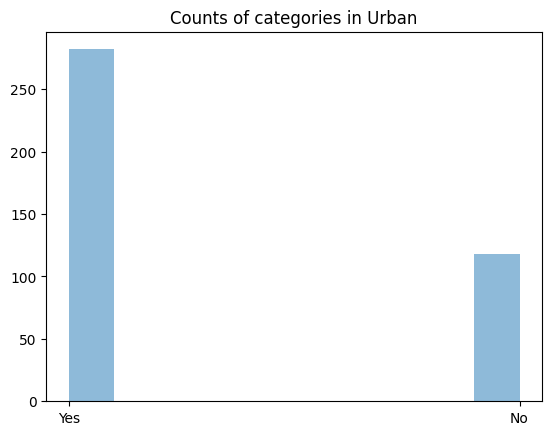

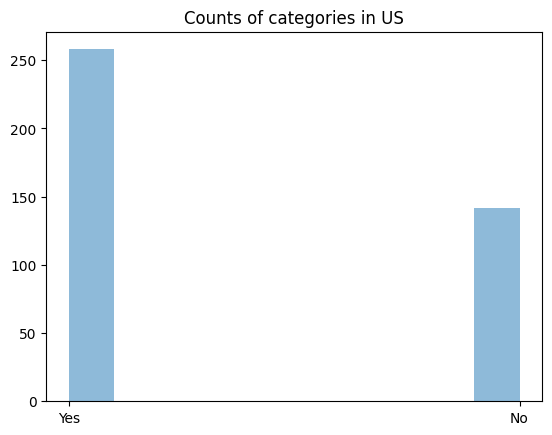

In [75]:
plt.subplots(figsize = (16,14), dpi = 50)
for i , col in enumerate(cat_cols):
    plt.hist(df[col] , alpha = 0.5)
    plt.title(f"Counts of categories in {col}")
    plt.show()

### Lets check for Outliers

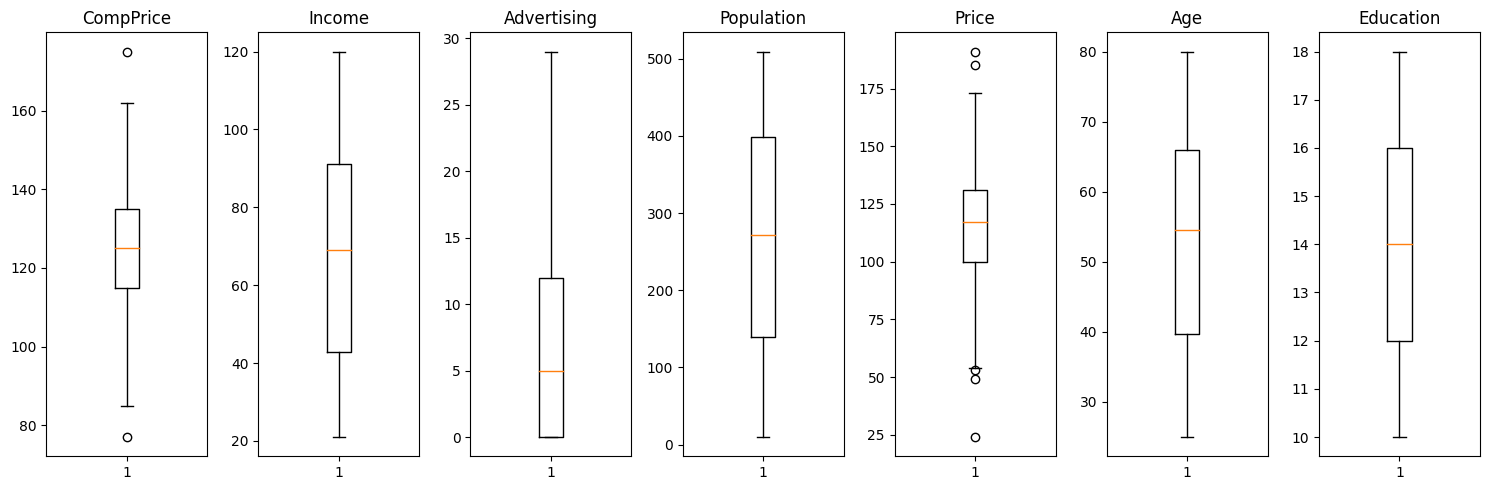

In [76]:
plt.figure(figsize=(15, 5))

sub = 151  # Adjust the starting subplot number

for i, col in enumerate(con_cols, 1):  # Start the loop from 1
    try:
        plt.subplot(1, len(con_cols), i)

        plt.boxplot(df[col])
        plt.title(col)
    except Exception as e:
        print(col, e)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


As we can see only ComPrice and Price have got some outliers both low valued and high valued

### Lets split the data into test and train

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [79]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
212,145,69,19,501,105,1,45,11,Yes,Yes
295,118,35,14,502,137,1,79,10,No,Yes
364,122,21,16,488,131,2,30,14,Yes,Yes
251,139,111,5,310,132,0,62,13,Yes,Yes
390,108,75,9,61,111,1,67,12,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,1,58,17,No,Yes
106,102,33,0,217,139,1,70,18,No,No
270,119,26,0,284,89,2,26,10,Yes,No
348,132,102,20,459,107,2,49,11,Yes,Yes


### Encoding and Scaling

In [80]:
from sklearn.preprocessing import OneHotEncoder
x_check = x_train
x_check_y = x_test


In [81]:
x_check

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
212,145,69,19,501,105,1,45,11,Yes,Yes
295,118,35,14,502,137,1,79,10,No,Yes
364,122,21,16,488,131,2,30,14,Yes,Yes
251,139,111,5,310,132,0,62,13,Yes,Yes
390,108,75,9,61,111,1,67,12,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,1,58,17,No,Yes
106,102,33,0,217,139,1,70,18,No,No
270,119,26,0,284,89,2,26,10,Yes,No
348,132,102,20,459,107,2,49,11,Yes,Yes


In [82]:
cat_cols
oe = OneHotEncoder(handle_unknown="ignore")
oe_train = pd.DataFrame(oe.fit_transform(x_check[cat_cols]).toarray(),index=x_check[cat_cols].index)
oe_test = pd.DataFrame(oe.transform(x_check_y[cat_cols]).toarray(), index=x_check_y[cat_cols].index)
# x_check[cat_cols]  = oe.fit_transform(x_check[cat_cols])
# x_check_y[cat_cols] = oe.transform(x_check_y[cat_cols])

In [83]:
oe_train

,0,1,2,3,4,5,6
212,0.0,1.0,0.0,0.0,1.0,0.0,1.0
295,0.0,1.0,0.0,1.0,0.0,0.0,1.0
364,0.0,0.0,1.0,0.0,1.0,0.0,1.0
251,1.0,0.0,0.0,0.0,1.0,0.0,1.0
390,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
71,0.0,1.0,0.0,1.0,0.0,0.0,1.0
106,0.0,1.0,0.0,1.0,0.0,1.0,0.0
270,0.0,0.0,1.0,0.0,1.0,1.0,0.0
348,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [85]:
con_cols
x_check[con_cols] = sc.fit_transform(x_check[con_cols])
x_check_y[con_cols] = sc.transform(x_check_y[con_cols])

In [86]:
oe_train

,0,1,2,3,4,5,6
212,0.0,1.0,0.0,0.0,1.0,0.0,1.0
295,0.0,1.0,0.0,1.0,0.0,0.0,1.0
364,0.0,0.0,1.0,0.0,1.0,0.0,1.0
251,1.0,0.0,0.0,0.0,1.0,0.0,1.0
390,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
71,0.0,1.0,0.0,1.0,0.0,0.0,1.0
106,0.0,1.0,0.0,1.0,0.0,1.0,0.0
270,0.0,0.0,1.0,0.0,1.0,1.0,0.0
348,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Lets check how the train final and test final sets turns out

In [87]:
train_final = pd.concat([x_check[con_cols],oe_train],axis=1)

In [88]:
# test_final = 
test_final = pd.concat([x_check_y[con_cols],oe_test],axis=1)

In [89]:
# train_final 
y_train

,Sales
212,12.04
295,4.21
364,10.50
251,3.72
390,5.47
...,...
71,6.50
106,0.16
270,11.99
348,12.57


### Lets Train the Model

In [90]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor(random_state=42)
train_final.columns = train_final.columns.astype(str)
rr.fit(train_final,y_train)

/home/its_relative/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [91]:
x = [x for x in range(10)]

In [92]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [93]:
paramGrid = {"criterion": ["squared_error", "absolute_error","friedman_mse", "poisson"],
             "max_depth":[x for x in range(3,10)],
             "min_samples_split": [ sp for sp in range(2,6)],
             "n_jobs": [-1]}

In [94]:
from sklearn.model_selection import RandomizedSearchCV
gv = RandomizedSearchCV(estimator=rr, param_distributions=paramGrid, n_iter=10, random_state=42)

gv.fit(train_final,y_train)


/home/its_relative/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/its_relative/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


/home/its_relative/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/its_relative/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/its_relative/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/its_relative/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_jobs': [-1]},
                   random_state=42)

Lets see the best parameters selected by RandomizedSearchCV

In [95]:
gv.best_params_

{'n_jobs': -1,
 'min_samples_split': 4,
 'max_depth': 9,
 'criterion': 'squared_error'}

### Lets check the score

In [97]:
gv.best_score_

0.5292460077605898